<a href="https://colab.research.google.com/github/nikhilapanyam/Neuroscience/blob/main/week11/EEG_processing_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import os

In [2]:
#@title Click to copy the class code repository
!git clone https://github.com/mattsmiths/biol470.git

Cloning into 'biol470'...
remote: Enumerating objects: 340, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 340 (delta 46), reused 38 (delta 17), pack-reused 238 (from 2)
Receiving objects: 100% (340/340), 124.32 MiB | 8.72 MiB/s, done.
Resolving deltas: 100% (85/85), done.
Updating files: 100% (162/162), done.


In [3]:
import glob
getFiles = glob.glob('/content/biol470/week11/data/*/*.wav')
for ele in getFiles:
  print(ele)

/content/biol470/week11/data/group3/group3_Favourite_2.wav
/content/biol470/week11/data/group3/group3_Classical_1.wav
/content/biol470/week11/data/group3/group3_Nothing_2.wav
/content/biol470/week11/data/group3/group3_Classical_2.wav
/content/biol470/week11/data/group3/group3_Sad_2.wav
/content/biol470/week11/data/group3/group3_Nothing_1.wav
/content/biol470/week11/data/group3/group3_Upbeat_1.wav
/content/biol470/week11/data/group3/group3_Fav_1.wav
/content/biol470/week11/data/group3/group3_Upbeat_2.wav
/content/biol470/week11/data/group_2/JJC.wav
/content/biol470/week11/data/group_2/TRIAL.wav
/content/biol470/week11/data/group_2/WO.wav
/content/biol470/week11/data/group_1/Surprise (Unheard) BYB_Recording_2025-03-27_12.21.10.wav
/content/biol470/week11/data/group_1/BYB_Recording_2025-03-27_12.35.39.wav
/content/biol470/week11/data/group_1/Novelty BYB_Recording_2025-03-27_12.24.18.wav
/content/biol470/week11/data/group_1/Test BYB_Recording_2025-03-27_12.20.34.wav
/content/biol470/week11

In [4]:
audioPath1 = '/content/biol470/week11/data/group3/group3_Favourite_2.wav'

In [5]:
audioPath2 = '/content/biol470/week11/data/group3/group3_Nothing_2.wav'

In [6]:
# Reading in the file
audio, sr = librosa.load(audioPath1,mono=False)  # Load audio file
print(len(audio)/sr)


31.071337868480725


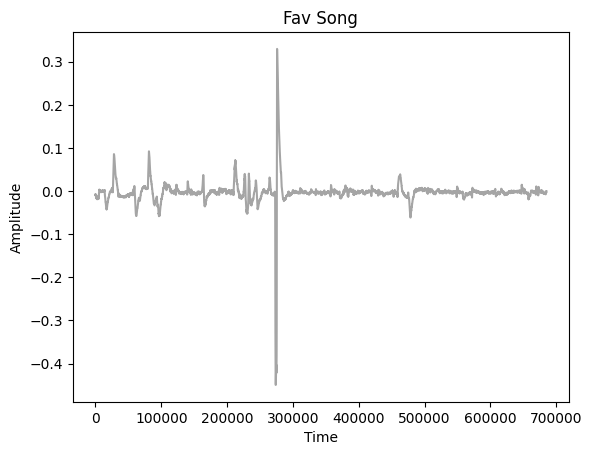

In [15]:
plt.figure()
plt.plot(audio,color=(0.3,0.3,0.3,0.5))
plt.title('Fav Song')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [8]:
xsecs = np.arange(0,len(audio),sr)
print('The duration of the recording is: %s seconds'%len(xsecs))

The duration of the recording is: 32 seconds


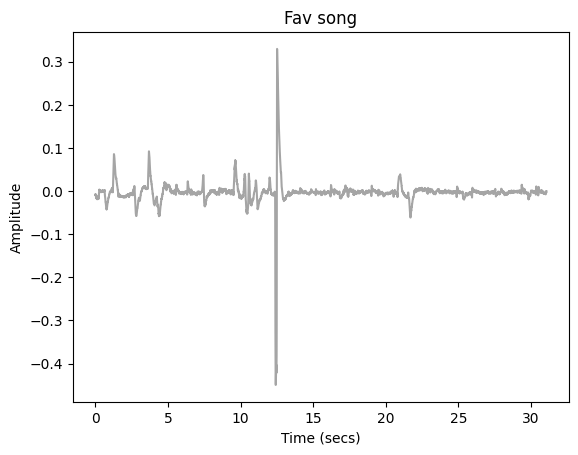

In [18]:
xsecs = np.arange(0,len(audio),(sr*5))

plt.figure()
plt.plot(audio,color=(0.3,0.3,0.3,0.5))
plt.title('Fav song')
plt.xlabel('Time (secs)')
plt.ylabel('Amplitude')

temp = np.arange(0,len(xsecs))*5

ll = plt.xticks(xsecs,temp)




31.071337868480725
31.657233560090702


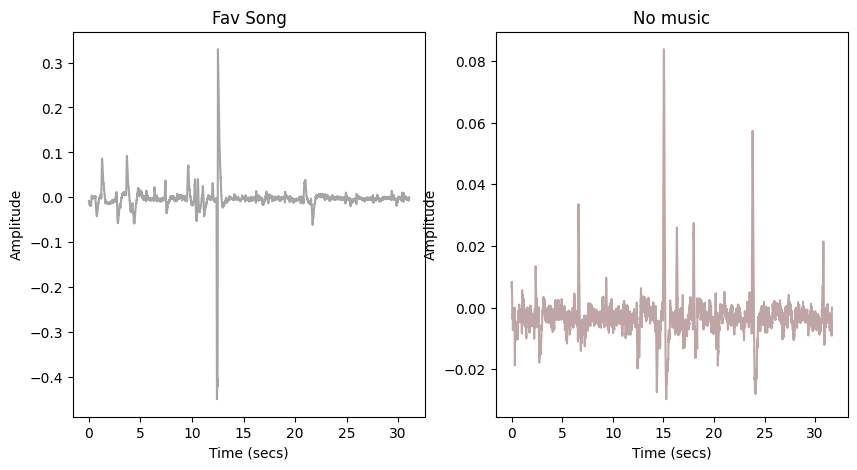

In [17]:
# Reading in the file 1
audio1, sr1 = librosa.load(audioPath1,mono=False)  # Load audio file
print(len(audio1)/sr1)

# Reading in the file 2
audio2, sr2 = librosa.load(audioPath2,mono=False)  # Load audio file
print(len(audio2)/sr2)


plt.figure(figsize=(10,5))

# for the first plot
plt.subplot(1,2,1)
xsecs1 = np.arange(0,len(audio1),(sr1*5))
plt.plot(audio1,color=(0.3,0.3,0.3,0.5))
plt.title('Fav Song')
plt.xlabel('Time (secs)')
plt.ylabel('Amplitude')
temp = np.arange(0,len(xsecs))*5
ll = plt.xticks(xsecs,temp)

# for the second plot
plt.subplot(1,2,2)
xsecs2 = np.arange(0,len(audio2),(sr2*5))
plt.plot(audio2,color=(0.5,0.3,0.3,0.5))
plt.title('No music')
plt.xlabel('Time (secs)')
plt.ylabel('Amplitude')
temp = np.arange(0,len(xsecs2))*5
ll = plt.xticks(xsecs2,temp)

31.071337868480725
31.657233560090702


Text(0.5, 1.0, 'Comparing Amplitudes')

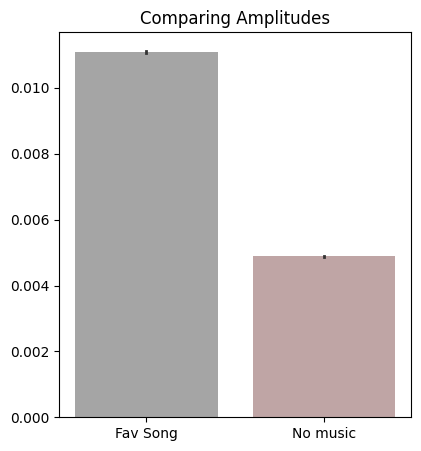

In [16]:
# Reading in the file 1
audio1, sr1 = librosa.load(audioPath1,mono=False)  # Load audio file
print(len(audio1)/sr1)

# Reading in the file 2
audio2, sr2 = librosa.load(audioPath2,mono=False)  # Load audio file
print(len(audio2)/sr2)


plt.figure(figsize=(10,5))

# for the first plot
plt.subplot(1,2,1)

# amplitude mean of audio 1
mean1 = np.mean(abs(audio1))
sem1 = np.std(abs(audio1))/np.sqrt(len(audio1))
plt.bar('Fav Song',mean1,color=(0.3,0.3,0.3,0.5))
plt.plot([0,0],[mean1-sem1,mean1+sem1],color=(0.2,0.2,0.2),linewidth=2)


# amplitude mean of audio 2
mean2 = np.mean(abs(audio2))
sem2 = np.std(abs(audio2))/np.sqrt(len(audio2))
plt.bar('No music',mean2,color=(0.5,0.3,0.3,0.5))
plt.plot([1,1],[mean2-sem2,mean2+sem2],color=(0.2,0.2,0.2),linewidth=2)

plt.title('Comparing Amplitudes')



In [12]:
# Perform Fourier Transform to extract frequencies
# Apply Fast Fourier Transform (FFT) to the audio signal
fft_result = np.fft.fft(audio1)
fft_result = np.fft.fft(audio1)
fft_freq = np.fft.fftfreq(len(fft_result), 1/sr1)

# Only keep the positive frequencies
# your x label (what frequency)
positive_frequencies = fft_freq[:len(fft_freq)//2]

# the count of that frequency
positive_fft_result = np.abs(fft_result[:len(fft_result)//2])

Text(0.5, 0, 'Frequency (Hz)')

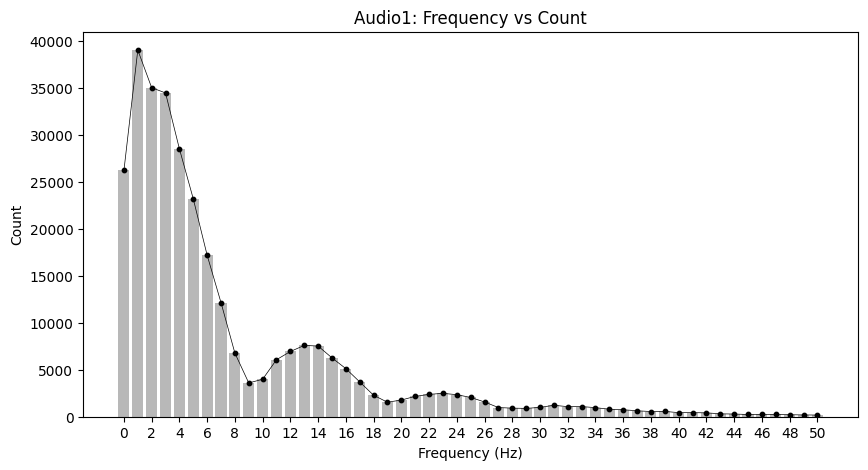

In [13]:
xx = []
yy = []
for ee in range(0,51):
  temp = 0
  for ind,ele in enumerate(positive_frequencies[:2000]):
    if ele > ee and ele <= ee+1:
      temp+=positive_fft_result[ind]
  xx.append(ee)
  yy.append(int(temp))

plt.figure(figsize=(10,5))
plt.bar(xx,yy,color=(0.65,0.65,0.65,0.8))
plt.plot(xx,yy,color=(0,0,0),linewidth=0.5)
plt.scatter(xx,yy,color=(0,0,0),s=10)
ii = plt.xticks(np.arange(0,51,2))
plt.title('Audio1: Frequency vs Count')
plt.ylabel('Count')
plt.xlabel('Frequency (Hz)')

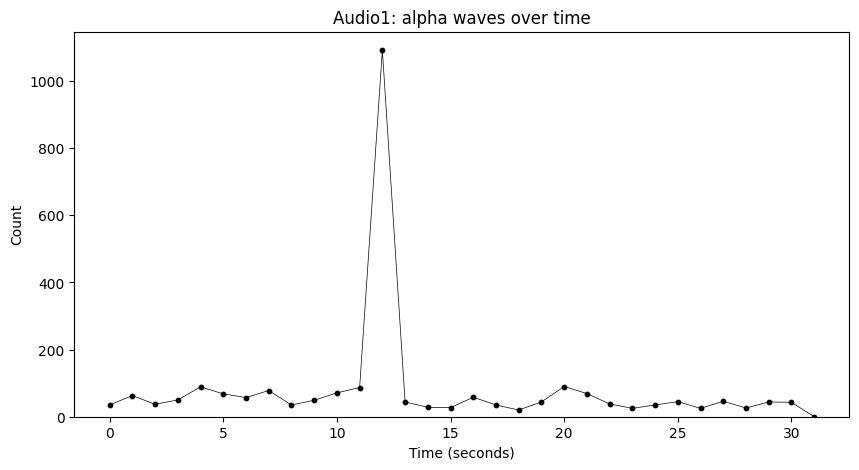

In [14]:
xx = []
yy = []

# alpha waves range
fMin = 8
fMax = 13



for secs in np.arange(0,len(audio1),sr):

  audioClip = audio1[secs:secs+sr]
  # Perform Fourier Transform to extract frequencies
  # Apply Fast Fourier Transform (FFT) to the audio signal
  fft_result = np.fft.fft(audioClip)
  fft_result = np.fft.fft(audioClip)
  fft_freq = np.fft.fftfreq(len(fft_result), 1/sr1)

  # Only keep the positive frequencies
  # your x label (what frequency)
  positive_frequencies = fft_freq[:len(fft_freq)//2]

  # the count of that frequency
  positive_fft_result = np.abs(fft_result[:len(fft_result)//2])

  temp = 0
  for ind,ele in enumerate(positive_frequencies[:2000]):
    if ele > fMin and ele <= fMax+1:
      temp+=positive_fft_result[ind]

  xx.append(secs+1)
  yy.append(int(temp))



plt.figure(figsize=(10,5))
plt.bar(xx,yy,color=(0.65,0.65,0.65,0.8))
plt.plot(xx,yy,color=(0,0,0),linewidth=0.5)
plt.scatter(xx,yy,color=(0,0,0),s=10)
#ii = plt.xticks(np.arange(0,51,2))
plt.title('Audio1: alpha waves over time')
plt.ylabel('Count')
plt.xlabel('Time (seconds)')

xsecs2 = np.arange(0,len(audio2),(sr2*5))
temp = np.arange(0,len(xsecs2))*5
ll = plt.xticks(xsecs2,temp)